In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd

In [3]:
df4 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/df4.csv")
df4.drop('Unnamed: 0', axis=1, inplace=True)
df4

,collision_no,year,month,day,hour,longitude,latitude,# involved,# injured,# KSI,# fatalities,road_class_Collector,road_class_Expressway,road_class_Expressway Ramp,road_class_Laneway,road_class_Local,road_class_Major Arterial,road_class_Major Arterial Ramp,road_class_Major Shoreline,road_class_Minor Arterial,road_class_Other,road_class_Private Property,road_surface_cond_DRY,road_surface_cond_ICE,road_surface_cond_LOOSE SAND OR GRAVEL,road_surface_cond_LOOSE SNOW,road_surface_cond_MUD,road_surface_cond_OTHER,road_surface_cond_PACKED SNOW,road_surface_cond_SLUSH,road_surface_cond_SPILLED LIQUID,road_surface_cond_WET,visibility_CLEAR,visibility_DRIFTING SNOW,"visibility_FOG, MIST, SMOKE, DUST",visibility_FREEZING RAIN,visibility_OTHER,visibility_RAIN,visibility_SNOW,visibility_STRONG WIND,...,"light_DUSK, ARTIFICIAL",light_OTHER,impact_type_ANGLE,impact_type_APPROACHING,impact_type_CYCLIST COLLISIONS,impact_type_OTHER,impact_type_PEDESTRIAN COLLISIONS,impact_type_REAR END,impact_type_SIDESWIPE,impact_type_SMV OTHER,impact_type_SMV UNATTENDED VEHICLE,impact_type_TURNING MOVEMENT,involved_class_ANIMAL,involved_class_CYCLIST,involved_class_CYCLIST - NOT HIT,involved_class_CYCLIST PASSENGER,involved_class_DRIVER,involved_class_DRIVER - NOT HIT,involved_class_IN-LINE SKATER,involved_class_MOPED DRIVER,involved_class_MOPED PASSENGER,involved_class_MOTORCYCLE DRIVER,involved_class_MOTORCYCLE PASSENGER,involved_class_OTHER,involved_class_OTHER PROPERTY OWNER,involved_class_PASSENGER,involved_class_PEDESTRIAN,involved_class_PEDESTRIAN - NOT HIT,involved_class_RUNAWAY - NO DRIVER,involved_class_TRAILER OWNER,involved_class_TRUCK DRIVER,involved_class_UNKNOWN - FTR,involved_class_VEHICLE OWNER,involved_class_WHEELCHAIR,involved_class_WITNESS,involved_injury_class_FATAL,involved_injury_class_MAJOR,involved_injury_class_MINIMAL,involved_injury_class_MINOR,involved_injury_class_NONE
0,1,2000,9,0,8,-79.456317,43.727732,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,2000,9,0,8,-79.456317,43.727732,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,2000,9,0,8,-79.456271,43.727698,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2,2000,9,0,8,-79.456271,43.727698,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2,2000,9,0,8,-79.456271,43.727698,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334484,1038396,2019,5,4,22,-79.351940,43.677554,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2334485,1038396,2019,5,4,22,-79.351940,43.677554,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2334486,1038397,2019,7,5,22,-79.314602,43.678378,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2334487,1038398,2019,10,1,9,-79.372333,43.651519,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [4]:
df4.columns

Index(['collision_no', 'year', 'month', 'day', 'hour', 'longitude', 'latitude',
       '# involved', '# injured', '# KSI', '# fatalities',
       'road_class_Collector', 'road_class_Expressway',
       'road_class_Expressway Ramp', 'road_class_Laneway', 'road_class_Local',
       'road_class_Major Arterial', 'road_class_Major Arterial Ramp',
       'road_class_Major Shoreline', 'road_class_Minor Arterial',
       'road_class_Other', 'road_class_Private Property',
       'road_surface_cond_DRY', 'road_surface_cond_ICE',
       'road_surface_cond_LOOSE SAND OR GRAVEL',
       'road_surface_cond_LOOSE SNOW', 'road_surface_cond_MUD',
       'road_surface_cond_OTHER', 'road_surface_cond_PACKED SNOW',
       'road_surface_cond_SLUSH', 'road_surface_cond_SPILLED LIQUID',
       'road_surface_cond_WET', 'visibility_CLEAR', 'visibility_DRIFTING SNOW',
       'visibility_FOG, MIST, SMOKE, DUST', 'visibility_FREEZING RAIN',
       'visibility_OTHER', 'visibility_RAIN', 'visibility_SNOW',
       '

In [5]:
# Features for the classification of '# KSI'
features = list(df4.columns[2:7]) + list(df4.columns[11:-5])  # NOT including: 'collision_no', 'year', '# involved', '# injured', '# KSI', '# fatalities'
                                                                             # 'involved_injury_class_FATAL', 'involved_injury_class_MAJOR', 'involved_injury_class_MINIMAL', 
                                                                             # 'involved_injury_class_MINOR', 'involved_injury_class_NONE'
features

['month',
 'day',
 'hour',
 'longitude',
 'latitude',
 'road_class_Collector',
 'road_class_Expressway',
 'road_class_Expressway Ramp',
 'road_class_Laneway',
 'road_class_Local',
 'road_class_Major Arterial',
 'road_class_Major Arterial Ramp',
 'road_class_Major Shoreline',
 'road_class_Minor Arterial',
 'road_class_Other',
 'road_class_Private Property',
 'road_surface_cond_DRY',
 'road_surface_cond_ICE',
 'road_surface_cond_LOOSE SAND OR GRAVEL',
 'road_surface_cond_LOOSE SNOW',
 'road_surface_cond_MUD',
 'road_surface_cond_OTHER',
 'road_surface_cond_PACKED SNOW',
 'road_surface_cond_SLUSH',
 'road_surface_cond_SPILLED LIQUID',
 'road_surface_cond_WET',
 'visibility_CLEAR',
 'visibility_DRIFTING SNOW',
 'visibility_FOG, MIST, SMOKE, DUST',
 'visibility_FREEZING RAIN',
 'visibility_OTHER',
 'visibility_RAIN',
 'visibility_SNOW',
 'visibility_STRONG WIND',
 'light_DARK',
 'light_DARK, ARTIFICIAL',
 'light_DAWN',
 'light_DAWN, ARTIFICIAL',
 'light_DAYLIGHT',
 'light_DAYLIGHT, ARTIFICI

In [0]:
df4_n19 = df4[df4['year']!=2019]  # all years except 2019!!!

# Separating out the features 
x = df4_n19[features]

# Separating out the target
y = df4_n19['# KSI']

In [7]:
import plotly.graph_objects as go

y_value = [df4_n19[df4_n19['# KSI']==0].shape[0], df4_n19[df4_n19['# KSI']==1].shape[0]]
fig = go.Figure(data=[go.Bar(
    x = ['NOT KSI', 'KSI'], 
    y = y_value,
    text = [(i/df4_n19.shape[0])*100 for i in y],
    textposition = 'outside',
    texttemplate = '%{text:.1f}'+'%')])
fig.update_layout(title ='',
                  xaxis = dict(
                      title = ''), 
                  yaxis = dict(
                      title = 'Number of people involved in collisions'))
fig.show()

Output hidden; open in https://colab.research.google.com to view.

## **SMOTE+PCA+RandomForest**
Now we apply PCA after SMOTE and before fitting the classifier (Random Forest):

In [0]:
# Splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=27)

print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (1819212, 76) (1819212,)
Test set: (454804, 76) (454804,)


In [0]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=27, ratio=1.0)
x_train, y_train = sm.fit_sample(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [0]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)   # Fit on training set only
x_test = sc.transform(x_test)         # Apply transform to both the training set and the test set

In [0]:
from sklearn.decomposition import PCA

pca = PCA(0.7)      # PCA() | PCA(0.9) | PCA(n_components=5)

x_train = pca.fit_transform(x_train)   # Fit on training set only
x_test = pca.transform(x_test)         # Apply transform to both the training set and the test set

In [0]:
# After generating our synthetic data points, let’s see how our prediction performs:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()  # n_estimators=10 | max_depth=1000, random_state=42
clf.fit(x_train, y_train)

# Predicting the test set results
y_pred = clf.predict(x_test)

Accuracy:  0.9878914873220113


[Text(0, 0.5, '- (NOT KSI)'), Text(0, 1.5, '+ (KSI)')]

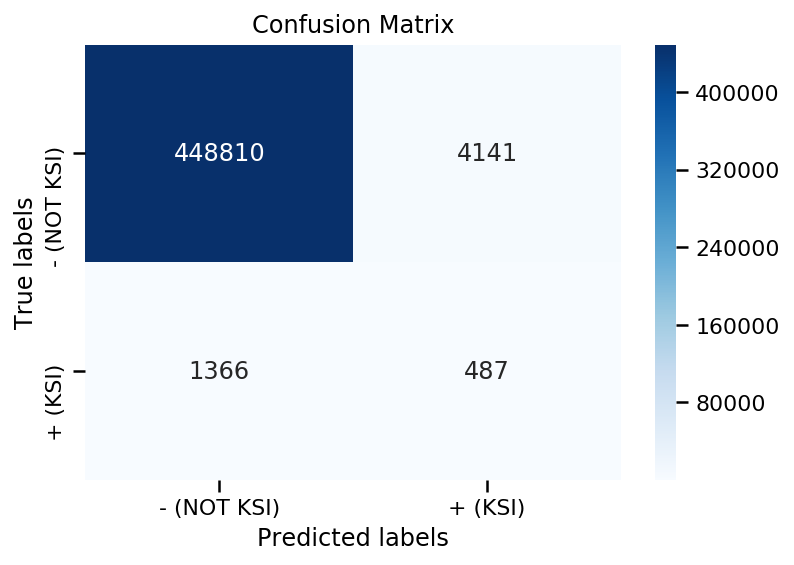

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)  

import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt='g')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['- (NOT KSI)', '+ (KSI)'])
ax.yaxis.set_ticklabels(['- (NOT KSI)', '+ (KSI)'])

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['0 (NOT KSI)', '1 (KSI)'])) 

              precision    recall  f1-score   support

 0 (NOT KSI)       1.00      0.99      0.99    452951
     1 (KSI)       0.11      0.26      0.15      1853

    accuracy                           0.99    454804
   macro avg       0.55      0.63      0.57    454804
weighted avg       0.99      0.99      0.99    454804



In [0]:
# Feature importance
feature_imp = pd.Series(clf.feature_importances_, index=('PC{}'.format(i) for i in range(pca.explained_variance_ratio_.size))).sort_values(ascending=False)

fig = go.Figure(data=[go.Bar(
    x = feature_imp.index, 
    y = feature_imp,
    text = feature_imp,
    textposition = 'outside',
    texttemplate = '%{text:.2f}'+'%')])
fig.update_layout(title = '',
                  xaxis = dict(
                      title = 'Features'), 
                  yaxis = dict(
                      title = 'Feature Importance Score'
                  ))
fig.show()

In [0]:
feature_imp_df = pd.DataFrame(feature_imp, columns=['Feature Importance Score'])
feature_imp_df.to_csv('feature_imp_df.csv')
feature_imp_df

,Feature Importance Score
PC1,0.176059
PC0,0.050318
PC4,0.047585
PC13,0.044342
PC6,0.042777
PC5,0.040569
PC3,0.030642
PC11,0.030178
PC2,0.028750
PC14,0.026622


In [0]:
# # PCA on unlabeled data (only x)
# pca = PCA(n_components=5)    # PCA() | PCA(0.9) | PCA(n_components=5)
# pc = pca.fit_transform(x)

# df4_n19_pca = pd.DataFrame(data = pc, columns = ['PC{}'.format(i) for i in range(pca.explained_variance_ratio_.size)])

# print('Number of principal components: ', pca.explained_variance_ratio_.size)
# print('Total of explained variance: {:,.1f}%'.format(pca.explained_variance_ratio_.sum()*100))
# df4_n19_pca.head()

## **ADASYN+PCA+RandomForest**
Now we apply PCA after ADASYN and before fitting the classifier (Random Forest):

In [8]:
# Splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=27)

print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (1819212, 76) (1819212,)
Test set: (454804, 76) (454804,)


In [9]:
from imblearn.over_sampling import ADASYN

ad = ADASYN(random_state=27, ratio=1.0)
x_train, y_train = ad.fit_sample(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [0]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)   # Fit on training set only
x_test = sc.transform(x_test)         # Apply transform to both the training set and the test set

In [0]:
from sklearn.decomposition import PCA

pca = PCA(0.7)      # PCA() | PCA(0.9) | PCA(n_components=5)

x_train = pca.fit_transform(x_train)   # Fit on training set only
x_test = pca.transform(x_test)         # Apply transform to both the training set and the test set

In [0]:
# After generating our synthetic data points, let’s see how our prediction performs:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()  # n_estimators=10 | max_depth=1000, random_state=42
clf.fit(x_train, y_train)

# Predicting the test set results
y_pred = clf.predict(x_test)

Accuracy:  0.9879464560557955


[Text(0, 0.5, '- (NOT KSI)'), Text(0, 1.5, '+ (KSI)')]

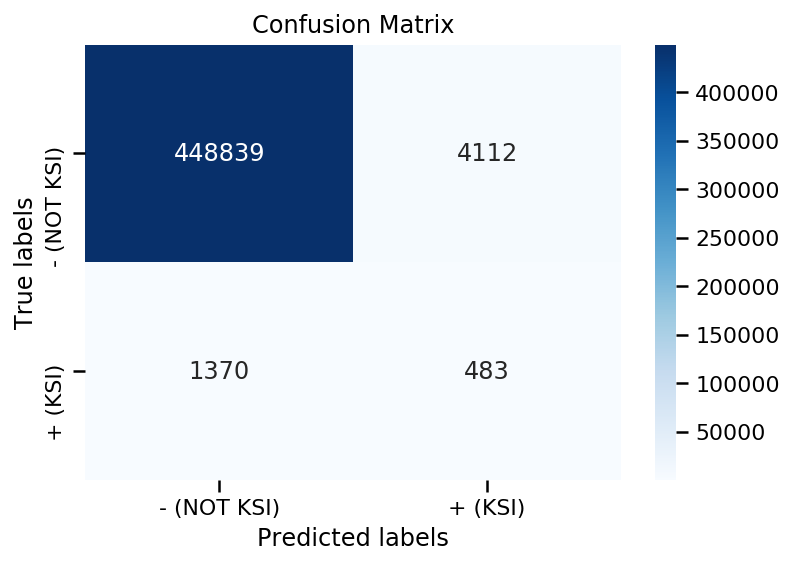

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)  

import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt='g')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['- (NOT KSI)', '+ (KSI)'])
ax.yaxis.set_ticklabels(['- (NOT KSI)', '+ (KSI)'])

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['0 (NOT KSI)', '1 (KSI)'])) 

              precision    recall  f1-score   support

 0 (NOT KSI)       1.00      0.99      0.99    452951
     1 (KSI)       0.11      0.26      0.15      1853

    accuracy                           0.99    454804
   macro avg       0.55      0.63      0.57    454804
weighted avg       0.99      0.99      0.99    454804

